<a href="https://colab.research.google.com/github/hannesstuehrenberg/Probabilistic-Machine-Learning_lecture-PROJECTS/blob/main/projects/08-1SHXXXX_football_analytics/notebooks/data_loading_and_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2. Data Loading and Exploration

- Code to load data
- Basic exploration (plots, statistics, missing data, etc.)

In [1]:
pip install mplsoccer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 kB 4.1 MB/s eta 0:00:00


In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import json
# plotting
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
# statistical fitting of models
#switch to scikitlearn
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
#opening data
import os
import pathlib
import warnings


pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [3]:
from mplsoccer import Sbopen
parser = Sbopen()

In [93]:
df_competition = parser.competition()
df_competition.info()
df_competition.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   competition_id             74 non-null     int64 
 1   season_id                  74 non-null     int64 
 2   country_name               74 non-null     object
 3   competition_name           74 non-null     object
 4   competition_gender         74 non-null     object
 5   competition_youth          74 non-null     bool  
 6   competition_international  74 non-null     bool  
 7   season_name                74 non-null     object
 8   match_updated              74 non-null     object
 9   match_updated_360          56 non-null     object
 10  match_available_360        10 non-null     object
 11  match_available            74 non-null     object
dtypes: bool(2), int64(2), object(8)
memory usage: 6.1+ KB


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
5,16,2,Europe,Champions League,male,False,False,2016/2017,2024-02-13T02:37:32.205154,2021-06-13T16:17:31.694,None,2024-02-13T02:37:32.205154
6,16,27,Europe,Champions League,male,False,False,2015/2016,2024-06-12T07:45:38.786894,2021-06-13T16:17:31.694,None,2024-06-12T07:45:38.786894
7,16,26,Europe,Champions League,male,False,False,2014/2015,2024-02-12T12:49:54.914228,2021-06-13T16:17:31.694,None,2024-02-12T12:49:54.914228
8,16,25,Europe,Champions League,male,False,False,2013/2014,2024-02-12T12:48:48.479157,2021-06-13T16:17:31.694,None,2024-02-12T12:48:48.479157
9,16,24,Europe,Champions League,male,False,False,2012/2013,2024-02-12T12:47:34.340413,2021-06-13T16:17:31.694,None,2024-02-12T12:47:34.340413


In [5]:
# This loads all matches across competitions and seasons
all_matches = pd.DataFrame()
df_competition = parser.competition()

for _, row in df_competition.iterrows():
    try:
        matches = parser.match(row['competition_id'], row['season_id'])
        all_matches = pd.concat([all_matches, matches], ignore_index=True)
    except:
        continue  # Some competition-season pairs might be missing data


In [7]:
match_counts = all_matches.groupby('competition_name').size().sort_values(ascending=False)


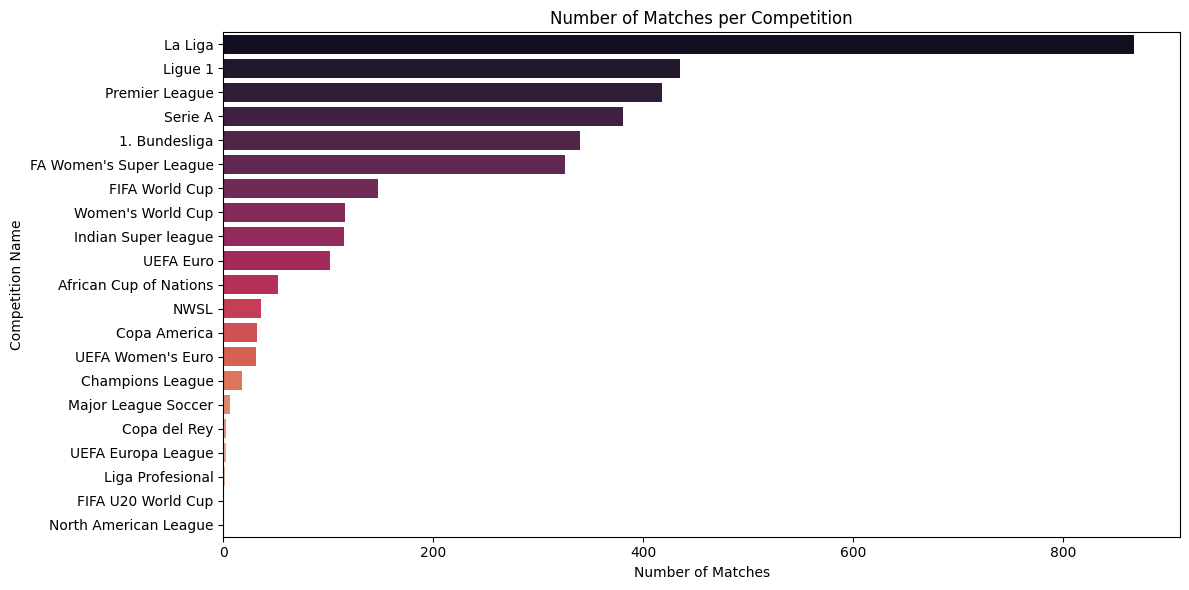

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=match_counts.values, y=match_counts.index, palette="rocket")

plt.title('Number of Matches per Competition')
plt.xlabel('Number of Matches')
plt.ylabel('Competition Name')
plt.tight_layout()
plt.show()


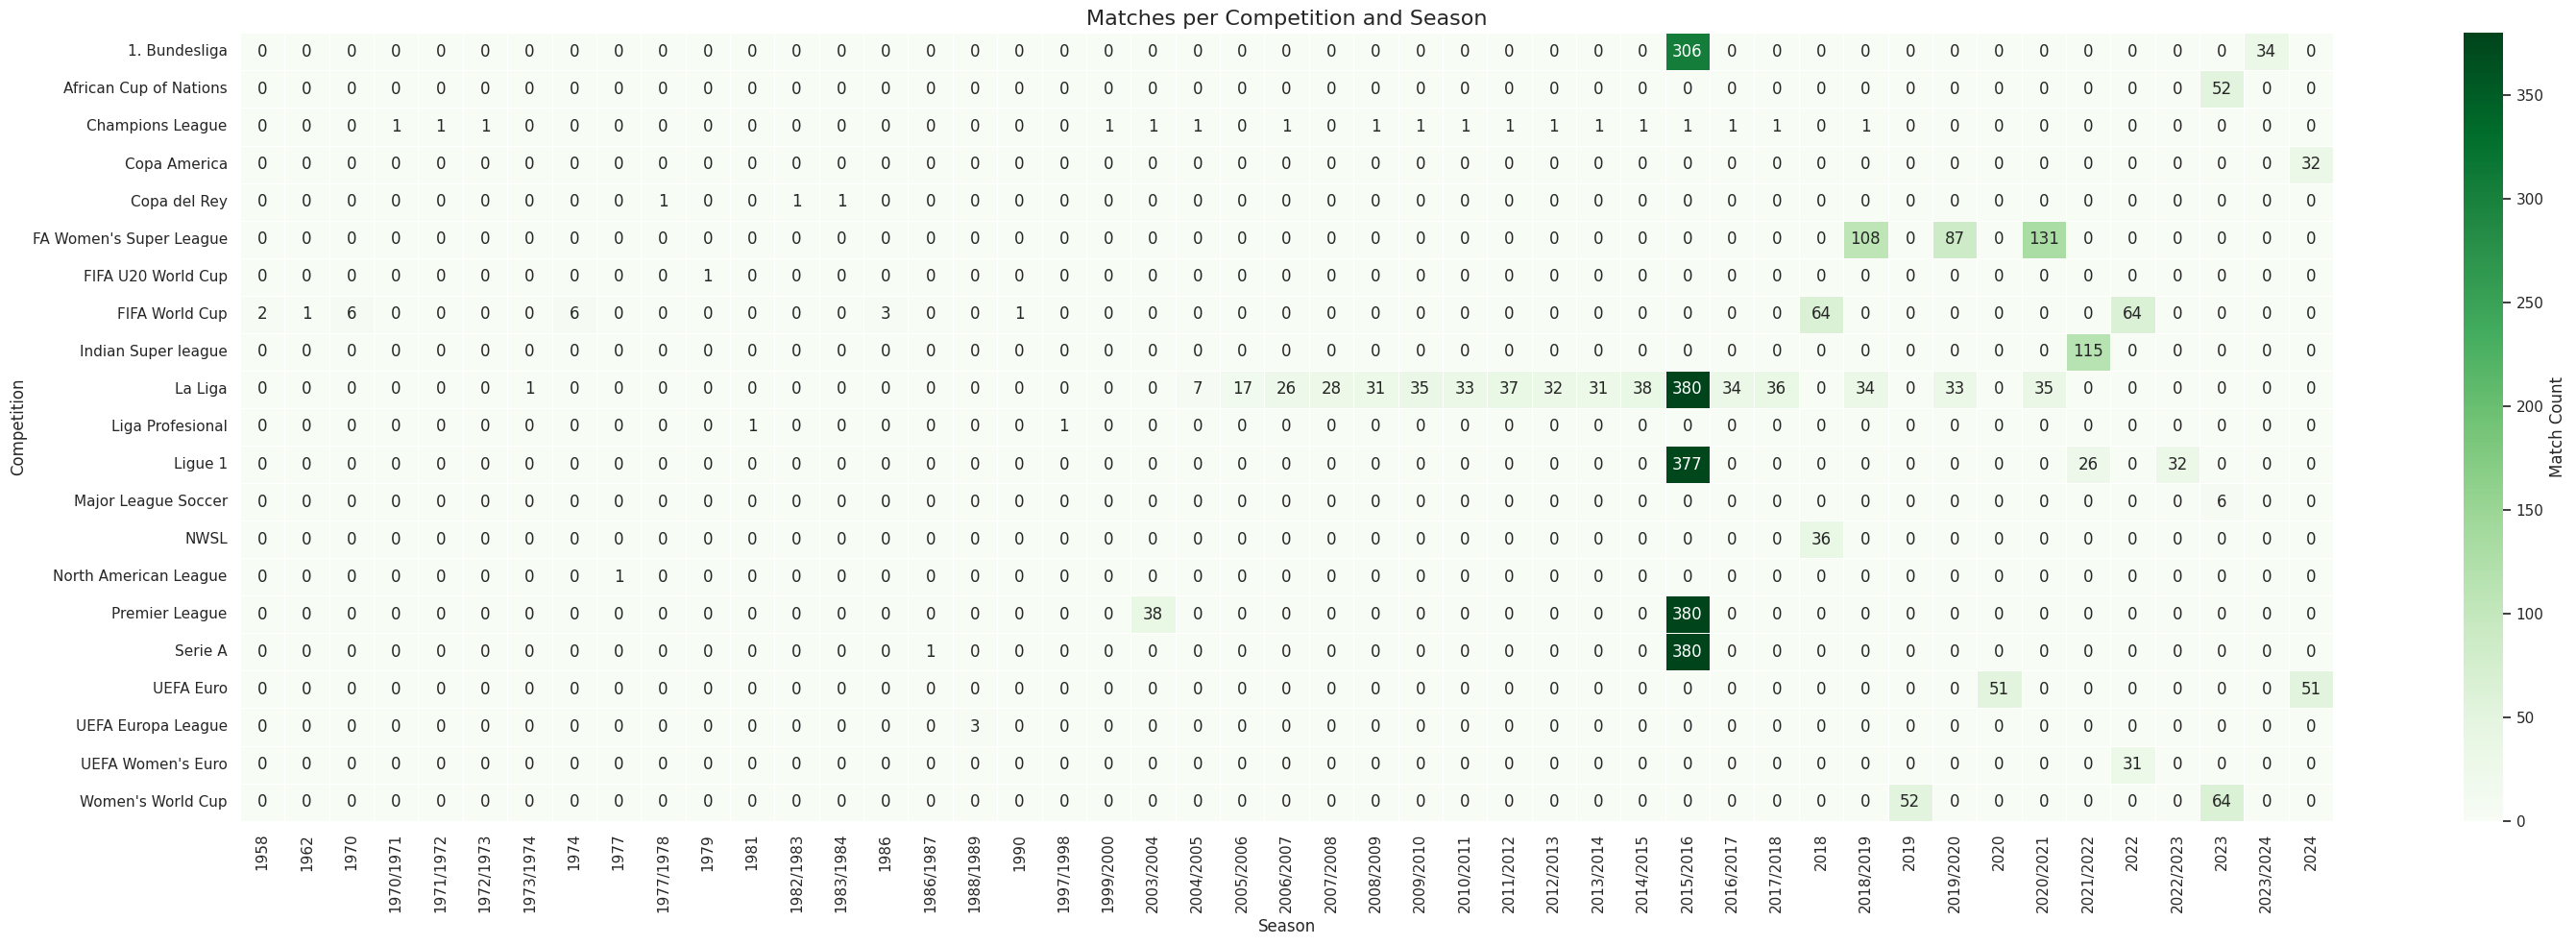

In [9]:
# Create a pivot table: rows = competition, columns = season, values = match count
pivot = all_matches.pivot_table(
    index='competition_name',
    columns='season_name',
    values='match_id',
    aggfunc='count',
    fill_value=0
)

# Remove total row and column before plotting
pivot_plot = pivot.drop(index='Total', errors='ignore') \
                              .drop(columns='Total', errors='ignore')


plt.figure(figsize=(30, 10))  # Increase width and height
sns.set(font_scale=1.0)       # Slightly bigger text, adjust if needed



# Plot heatmap without totals
ax = sns.heatmap(pivot_plot,
                 cmap = "Greens",
                 linewidths=0.5,
                 annot=True,
                 fmt='d',
                 cbar_kws={'label': 'Match Count'})

plt.title('Matches per Competition and Season', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Competition')
plt.tight_layout()
plt.show()


In [100]:
df_event, df_related, df_freeze, df_tactics = parser.event(69301)
df_event['type_name'].value_counts()

,count
type_name,
Pass,921
Ball Receipt,832
Carry,765
Pressure,236
Ball Recovery,126
Duel,72
Clearance,57
Block,41
Dispossessed,35


In [33]:
shots_df = df_event[df_event["type_name"] == 'Shot']
shots_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 339 to 3195
Data columns (total 73 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19 non-null     object 
 1   index                           19 non-null     int64  
 2   period                          19 non-null     int64  
 3   timestamp                       19 non-null     object 
 4   minute                          19 non-null     int64  
 5   second                          19 non-null     int64  
 6   possession                      19 non-null     int64  
 7   duration                        19 non-null     float64
 8   match_id                        19 non-null     int64  
 9   type_id                         19 non-null     int64  
 10  type_name                       19 non-null     object 
 11  possession_team_id              19 non-null     int64  
 12  possession_team_name            19 non-

In [73]:
shots = df_event[df_event['type_name'] == 'Shot']


shot_fields = [
    'id',
    'team_id',
    'team_name',
    'shot_key_pass_id',
    'x',
    'y',
    'end_x',
    'end_y',
    'end_z',
    'aerial_won',
    #'follows_dribble',
    'shot_first_time',
    #'freeze_frame',
    #'open_goal',
    'shot_statsbomb_xg',
    #'deflected',
    'block_deflection',    #is this column necessary?
    'technique_id',
    'technique_name',
    'body_part_id',
    'body_part_name',
    'sub_type_id',
    'sub_type_name',
    'outcome_id',
    'outcome_name'
]

shot_df_reduced = shots[shot_fields]
shot_df_reduced.head(50)

,id,team_id,team_name,shot_key_pass_id,x,y,end_x,end_y,end_z,aerial_won,...,shot_statsbomb_xg,block_deflection,technique_id,technique_name,body_part_id,body_part_name,sub_type_id,sub_type_name,outcome_id,outcome_name
339,a425a1dc-0ce2-415e-bf03-55c6b95e794a,858,Sweden Women's,NaN,104.7,45.5,120.0,43.6,0.2,NaN,...,0.105188,NaN,93.0,Normal,40.0,Right Foot,87.0,Open Play,97.0,Goal
530,29463e66-91b9-4d03-aae5-d40a35da078c,858,Sweden Women's,d965f959-89c6-4dba-8d96-0db33d767d5f,110.9,53.1,118.4,44.2,0.7,NaN,...,0.039004,NaN,93.0,Normal,38.0,Left Foot,87.0,Open Play,116.0,Saved to Post
719,cf531f3a-9c18-49b8-8cfd-7d04806033db,858,Sweden Women's,cfd65365-fe65-4f44-977b-35444b9f2016,107.8,26.1,120.0,43.9,1.0,NaN,...,0.035328,NaN,93.0,Normal,40.0,Right Foot,87.0,Open Play,97.0,Goal
741,4bb16d93-d6e4-4717-89b8-950b3dfbfa93,865,England Women's,NaN,93.7,51.1,118.8,43.9,0.4,NaN,...,0.018011,NaN,91.0,Half Volley,40.0,Right Foot,87.0,Open Play,100.0,Saved
955,820f6924-fa10-420d-81f7-f6a66d589edd,865,England Women's,101b0757-53cd-46e2-a8b0-b4c48fd84df2,108.0,52.7,120.0,36.1,0.3,NaN,...,0.100729,NaN,93.0,Normal,38.0,Left Foot,87.0,Open Play,97.0,Goal
1326,8a45dfd3-2310-48f6-89fe-8c5ae708a94a,858,Sweden Women's,NaN,83.6,47.1,117.5,42.8,0.5,NaN,...,0.006903,NaN,93.0,Normal,40.0,Right Foot,87.0,Open Play,100.0,Saved
1484,daabd728-fbb8-4c01-abd1-6989b78bc00f,858,Sweden Women's,NaN,105.4,25.5,120.0,41.1,4.6,NaN,...,0.124660,NaN,92.0,Lob,40.0,Right Foot,87.0,Open Play,98.0,Off T
1576,f736b03f-8586-4d14-8541-f291c034ef48,865,England Women's,b2612645-ff47-4aa5-a959-f35a0ed38d65,108.4,53.3,113.9,46.9,0.5,NaN,...,0.139090,NaN,93.0,Normal,40.0,Right Foot,87.0,Open Play,100.0,Saved
1781,4c2ba976-abfe-4968-891f-ff869407a670,865,England Women's,248ad161-183e-4493-8d4c-3a33cb7fdf7c,84.3,31.3,103.3,32.8,NaN,NaN,...,0.006838,NaN,93.0,Normal,38.0,Left Foot,87.0,Open Play,96.0,Blocked
1793,c20c4661-1578-4c5b-90cc-3f989bd881cb,865,England Women's,4ac8b335-6da2-4af5-ba3e-4624e10162cd,81.9,35.2,120.0,34.2,0.6,NaN,...,0.006616,NaN,93.0,Normal,40.0,Right Foot,87.0,Open Play,98.0,Off T


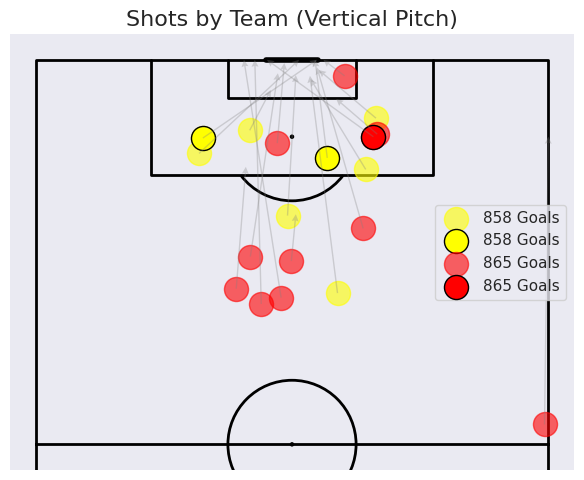

In [77]:
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt

# Set up vertical pitch
pitch = VerticalPitch(line_color='black', pitch_type='statsbomb', half=True)
fig, ax = pitch.draw(figsize=(6, 10))

# Define team colors by team_id
team_colors = {
    '858': 'yellow',
    '865': 'red'
}

# Plot shots per team
for team_id, color in team_colors.items():
    team_shots = shots_df[shots_df['team_id'].astype(str) == team_id]
    pitch.scatter(team_shots['x'], team_shots['y'], s=300, c=color, alpha=0.6, label=f'{team_id} Goals', ax=ax)

    # Highlight goals for this team
    team_goals = team_shots[team_shots['outcome_name'] == 'Goal']
    pitch.scatter(team_goals['x'], team_goals['y'], s=300, c=color, edgecolors='black', label=f'{team_id} Goals', ax=ax)

# Optional: Arrows to end location
pitch.arrows(shots_df['x'], shots_df['y'], shots_df['end_x'], shots_df['end_y'],
             width=1, headwidth=5, headlength=5, color='gray', alpha=0.3, ax=ax)

# Legend and title
ax.legend()
ax.set_title('Shots by Team (Vertical Pitch)', fontsize=16)
plt.show()


In [87]:
df_first_goal_freeze = df_freeze[df_freeze["id"] == 'a425a1dc-0ce2-415e-bf03-55c6b95e794a']
df_first_goal_freeze.info()
df_first_goal_freeze.head(13)

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 0 to 13
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   teammate         14 non-null     bool   
 1   match_id         14 non-null     int64  
 2   id               14 non-null     object 
 3   x                14 non-null     float64
 4   y                14 non-null     float64
 5   player_id        14 non-null     int64  
 6   player_name      14 non-null     object 
 7   position_id      14 non-null     int64  
 8   position_name    14 non-null     object 
 9   event_freeze_id  14 non-null     int64  
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 1.1+ KB


,teammate,match_id,id,x,y,player_id,player_name,position_id,position_name,event_freeze_id
0,True,69301,a425a1dc-0ce2-415e-bf03-55c6b95e794a,110.2,38.8,10229,Emma Stina Blackstenius,23,Center Forward,1
1,False,69301,a425a1dc-0ce2-415e-bf03-55c6b95e794a,94.0,24.7,10180,Ellen White,23,Center Forward,2
2,False,69301,a425a1dc-0ce2-415e-bf03-55c6b95e794a,100.2,36.4,4641,Francesca Kirby,15,Left Center Midfield,3
3,False,69301,a425a1dc-0ce2-415e-bf03-55c6b95e794a,101.9,45.3,15619,Bethany Mead,16,Left Midfield,4
4,True,69301,a425a1dc-0ce2-415e-bf03-55c6b95e794a,107.4,58.1,13881,Eva Sofia Jakobsson,17,Right Wing,5
5,False,69301,a425a1dc-0ce2-415e-bf03-55c6b95e794a,107.4,18.7,4654,Nikita Parris,12,Right Midfield,6
6,False,69301,a425a1dc-0ce2-415e-bf03-55c6b95e794a,101.5,27.6,10172,Jill Scott,13,Right Center Midfield,7
7,False,69301,a425a1dc-0ce2-415e-bf03-55c6b95e794a,107.1,26.0,10178,Lucy Bronze,2,Right Back,8
8,False,69301,a425a1dc-0ce2-415e-bf03-55c6b95e794a,118.7,42.7,19421,Carly Mitchell Telford,1,Goalkeeper,9
9,False,69301,a425a1dc-0ce2-415e-bf03-55c6b95e794a,113.1,45.5,10252,Alex Greenwood,6,Left Back,10


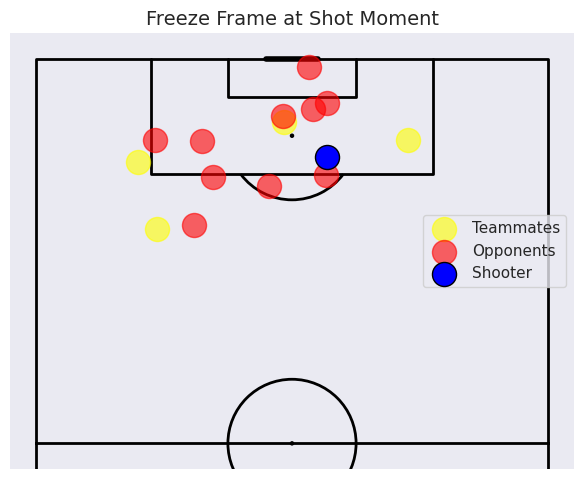

In [98]:
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt

pitch = VerticalPitch(pitch_type='statsbomb', half=True, line_color='black')
fig, ax = pitch.draw(figsize=(6, 10))

event_id = 'a425a1dc-0ce2-415e-bf03-55c6b95e794a'
freeze = df_first_goal_freeze

# Separate teammates and opponents
teammates = freeze[freeze['teammate'] == True]
opponents = freeze[freeze['teammate'] == False]

# Plot teammates in blue
pitch.scatter(teammates['x'], teammates['y'], s=300, c='yellow', alpha=0.6, label='Teammates', ax=ax)

# Plot opponents in red
pitch.scatter(opponents['x'], opponents['y'], s=300, c='red', alpha=0.6, label='Opponents', ax=ax)

# Highlight the shooter (assumes shooter is in teammates and has matching event ID)
shooter = shots_df[shots_df['id'] == event_id].iloc[0]
pitch.scatter(shooter['x'], shooter['y'], s=300, c='blue', edgecolors='black', label='Shooter', ax=ax)

# Title and legend
ax.set_title("Freeze Frame at Shot Moment", fontsize=14)
ax.legend(loc='right')
plt.show()


In [99]:
df_related[df_related["id"] == 'a425a1dc-0ce2-415e-bf03-55c6b95e794a']

,match_id,id,index,type_name,id_related,index_related,type_name_related
496,69301,a425a1dc-0ce2-415e-bf03-55c6b95e794a,340,Shot,e2c61b4a-f0eb-44f2-8899-df1778683ee9,341,Goal Keeper


In [106]:
matches_df = parser.match(competition_id=72, season_id=30)

match_ids = matches_df['match_id'].tolist()

all_shots = []

for match_id in match_ids:
    df_event, df_related, df_freeze, df_tactics = parser.event(match_id)


    df_shots = df_event[df_event['type_name'] == 'Shot']

    for col in shot_fields:
        if col not in df_shots.columns:
            df_shots[col] = None

    # Keep only the desired fields
    df_shots_clean = df_shots[shot_fields].copy()
    df_shots_clean['match_id'] = match_id

    all_shots.append(df_shots_clean)


In [109]:
df_shots_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 33 to 2504
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15 non-null     object 
 1   team_id            15 non-null     int64  
 2   team_name          15 non-null     object 
 3   shot_key_pass_id   11 non-null     object 
 4   x                  15 non-null     float64
 5   y                  15 non-null     float64
 6   end_x              15 non-null     float64
 7   end_y              15 non-null     float64
 8   end_z              12 non-null     float64
 9   aerial_won         0 non-null      object 
 10  shot_first_time    7 non-null      object 
 11  shot_statsbomb_xg  15 non-null     float64
 12  block_deflection   0 non-null      object 
 13  technique_id       15 non-null     float64
 14  technique_name     15 non-null     object 
 15  body_part_id       15 non-null     float64
 16  body_part_name     15 non-null